# Project 9 HR Analytics
-->> Aim of the project to analyse given data and to predict weather a particular employe will leave or not.

## Lets Load Important Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Lets Load the Dataset

In [2]:
data=pd.read_csv('Hrdata.csv')
data.head()

Age     BusinessTravel  DailyRate              Department  \
0   41      Travel_Rarely       1102                   Sales   
1   49  Travel_Frequently        279  Research & Development   
2   37      Travel_Rarely       1373  Research & Development   
3   33  Travel_Frequently       1392  Research & Development   
4   27      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  ... StandardHours  StockOptionLevel  \
0                        2  ...            80                 0   
1                        3  ...            80                 1   
2                        4  ...            80                 0   
3                        4  ...            80                 0   
4                        1  ...            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  
0                  4                        0                     5        Yes  
1                  7                        1                     7         No  
2                  0                        0                     0        Yes  
3                  7                        3                     0         No  
4                  2                        2                     2         No  

[5 rows x 35 columns]

## Information of the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate            

In [4]:
data.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

From the above we can see there are no null values

## Lets check the Correlation.

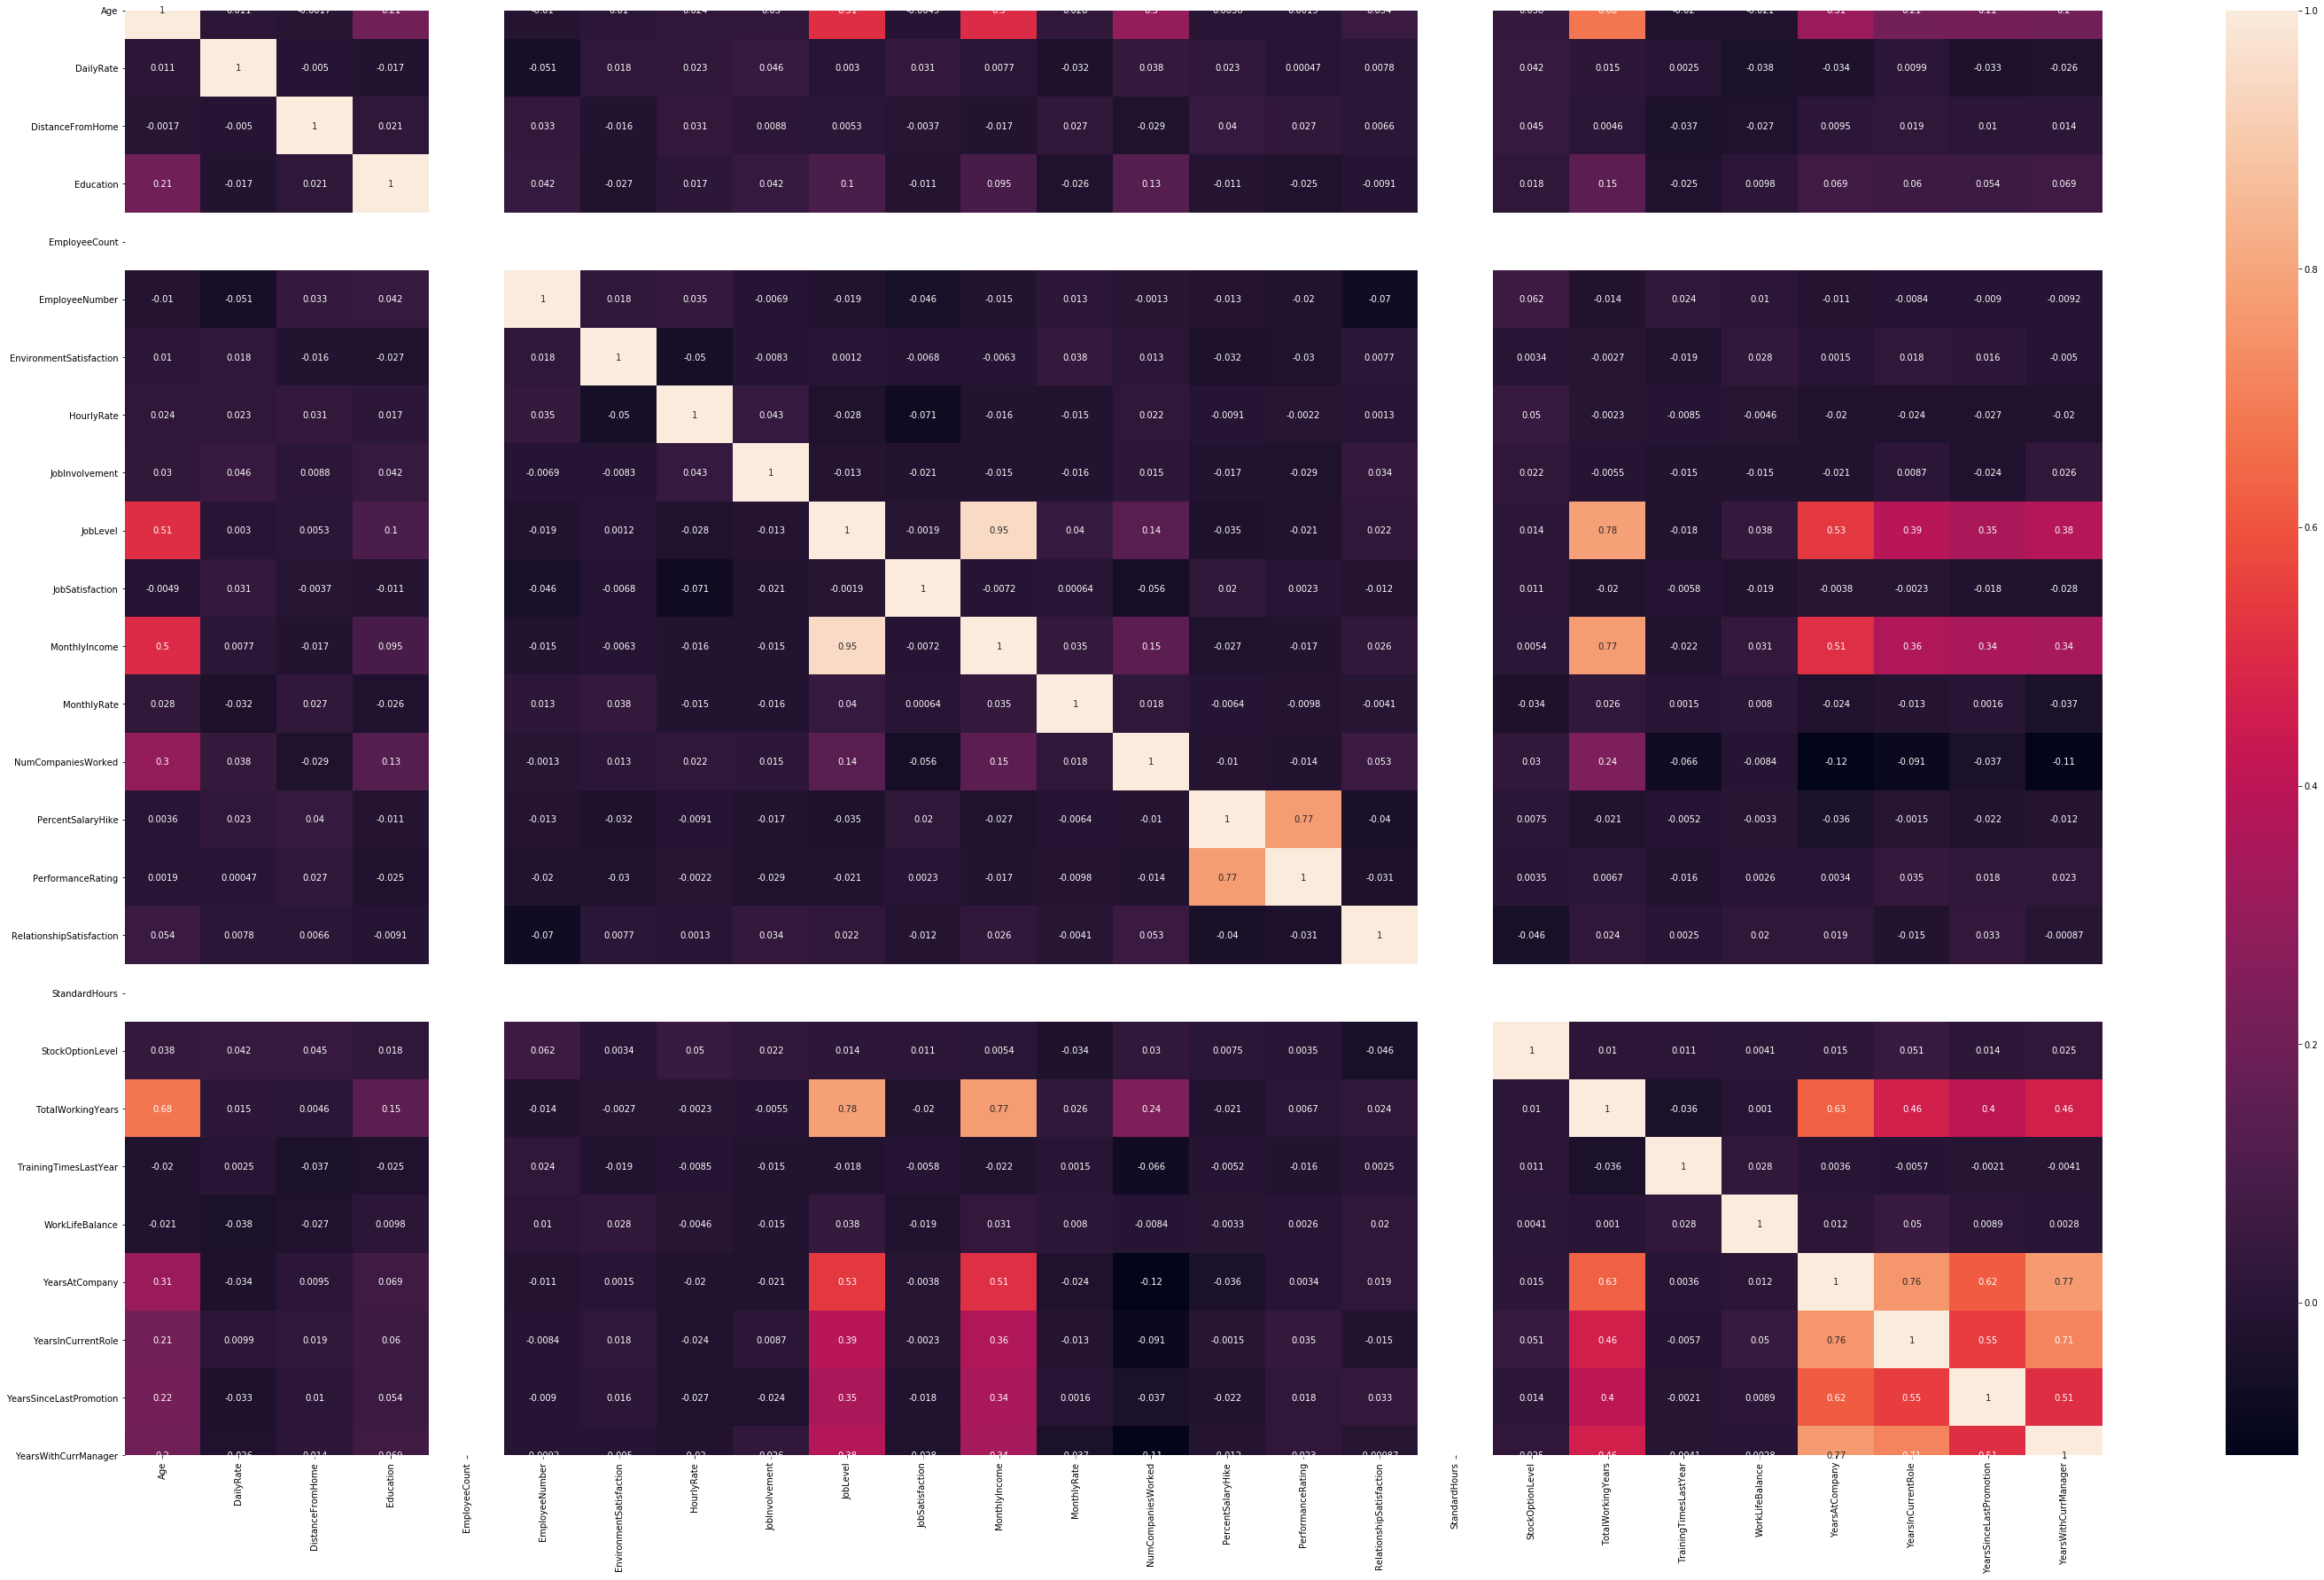

In [5]:
plt.figure(figsize=(50,30))
sns.heatmap(data.corr(), annot=True)

From the above correlation map we can see that their are few features that have no correlation with our indpendent variable, so we will drop those features and  we can see that performance rating and salary hike are highly correlated.

In [5]:
data.drop(['EmployeeNumber'],axis=1,inplace=True)
data.drop(['StandardHours'],axis=1,inplace=True)
data.drop(['EmployeeCount'],axis=1,inplace=True)
data.drop(['Over18'],axis=1,inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E529AA5F08>,
      dtype=object)

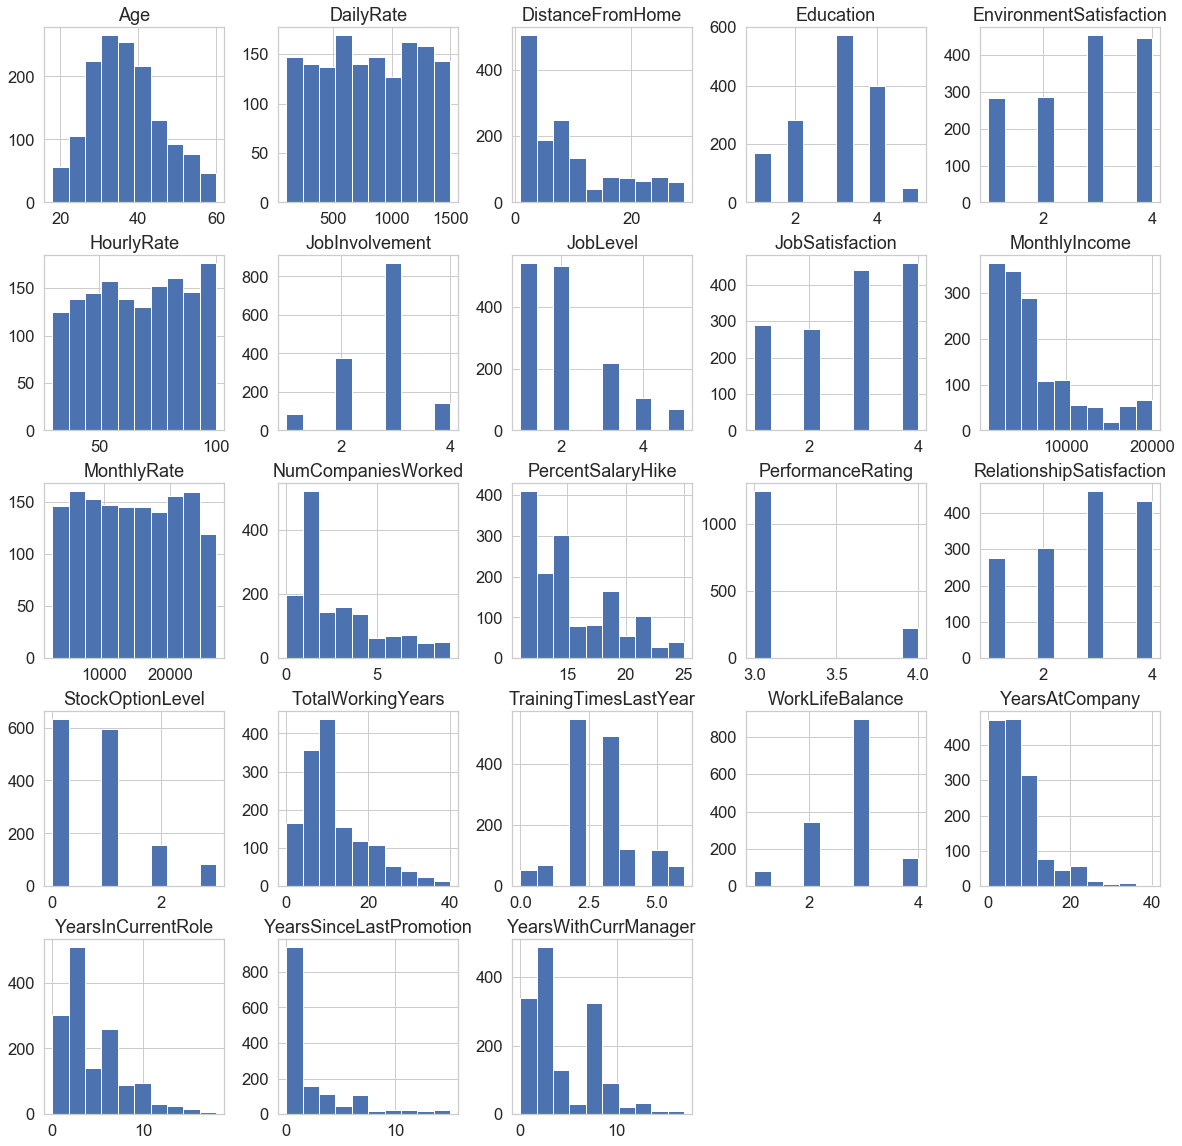

In [6]:
sns.set(style='whitegrid', palette="deep", font_scale=1.5)
data.hist(figsize=(20,20))

From the above sets of graphs we can see that most of the features are positively skewed and only few of the data are negatively skewed.

In [6]:
#Lets check the actual skewnes
data.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [7]:
#Lets treat the above skewness
for index in data.skew().index:
    if data.skew().loc[index]>0.55:
        data[index]=np.cbrt(data[index])

In [8]:
data.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.186998
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.460775
JobSatisfaction            -0.329672
MonthlyIncome               0.677032
MonthlyRate                 0.018578
NumCompaniesWorked         -0.699002
PercentSalaryHike           0.601248
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel           -0.139490
TotalWorkingYears          -0.395296
TrainingTimesLastYear      -2.498328
WorkLifeBalance            -0.552480
YearsAtCompany             -0.367351
YearsInCurrentRole         -0.866884
YearsSinceLastPromotion     0.198634
YearsWithCurrManager       -0.820395
dtype: float64

## Lets do the EDA

In [89]:
data.columns.to_series().groupby(data.dtypes).groups

{dtype('int64'): Index(['Age', 'DailyRate', 'Education', 'EnvironmentSatisfaction',
        'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MonthlyRate',
        'RelationshipSatisfaction', 'WorkLifeBalance'],
       dtype='object'),
 dtype('float64'): Index(['DistanceFromHome', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
        'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager'],
       dtype='object'),
 dtype('O'): Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
        'MaritalStatus', 'OverTime', 'Attrition'],
       dtype='object')}

In [8]:
## Lets split our categorical and numerical variables
data_cat=data[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
        'MaritalStatus', 'OverTime', 'Attrition']].copy()

In [9]:
data_int=data[['Age', 'DailyRate', 'DistanceFromHome', 'Education',
        'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
        'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager']].copy()

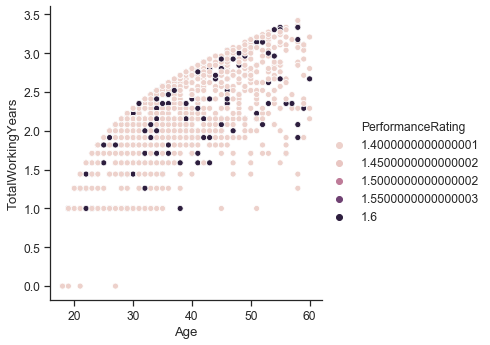

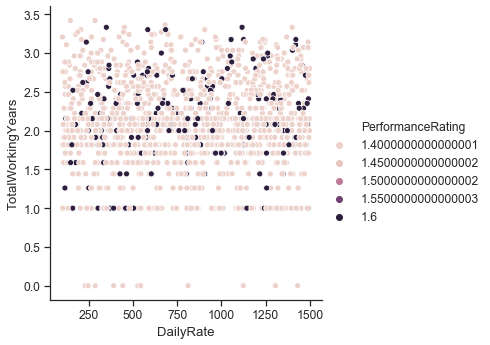

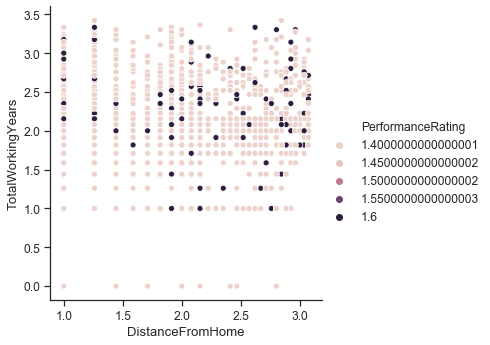

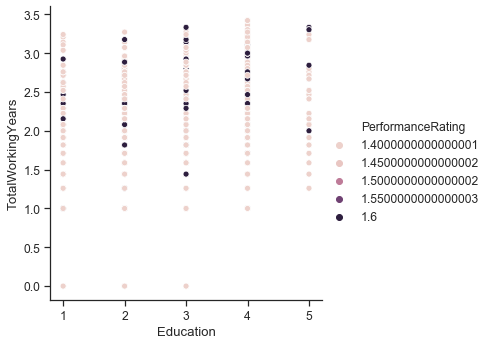

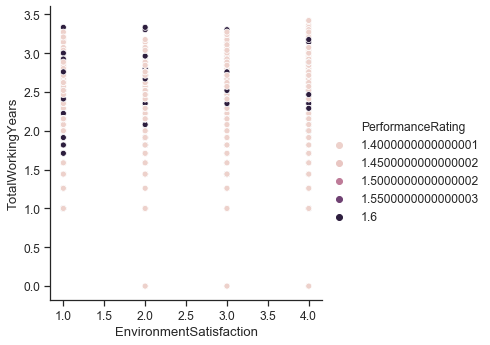

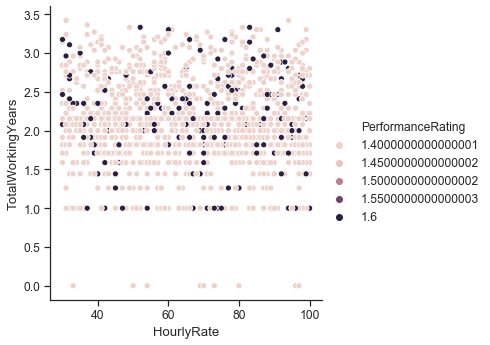

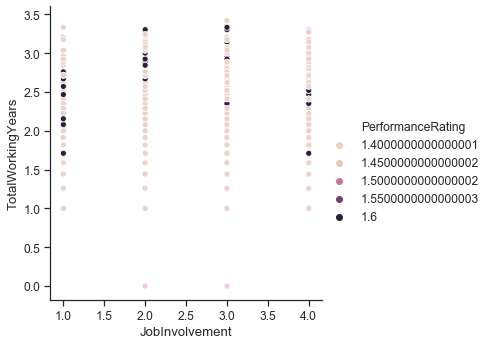

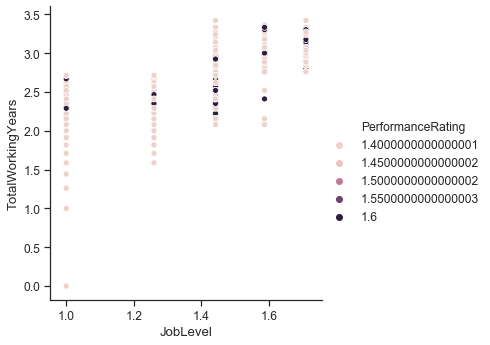

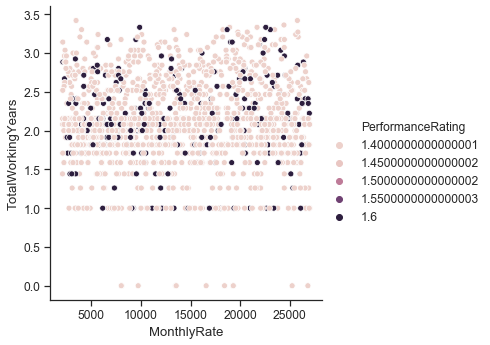

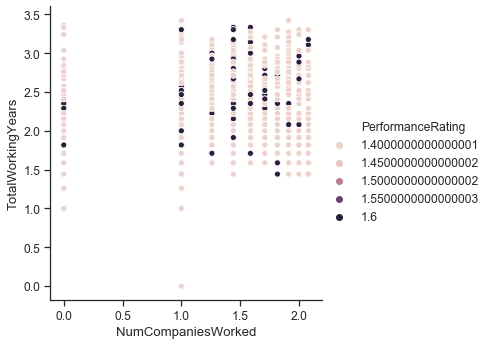

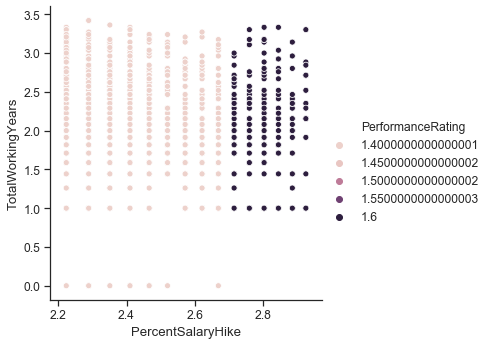

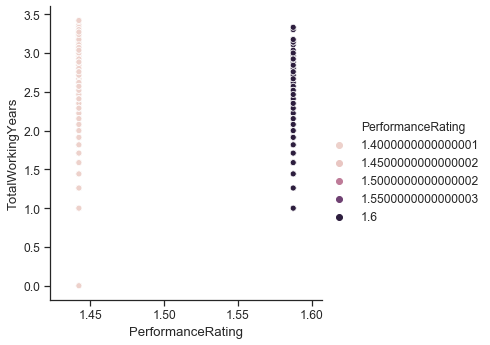

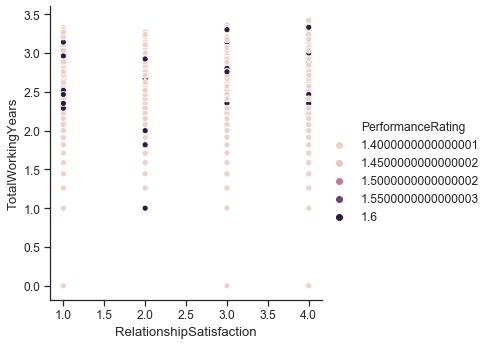

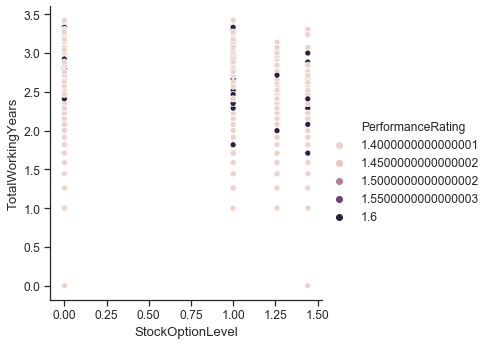

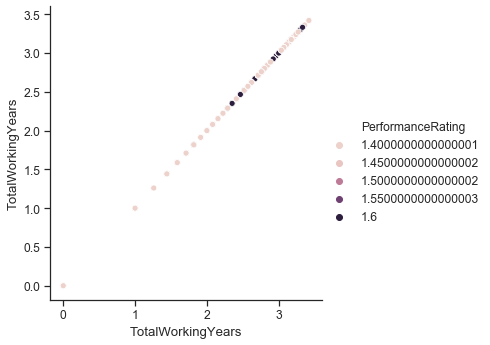

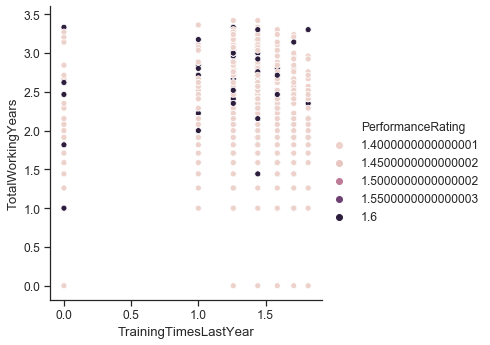

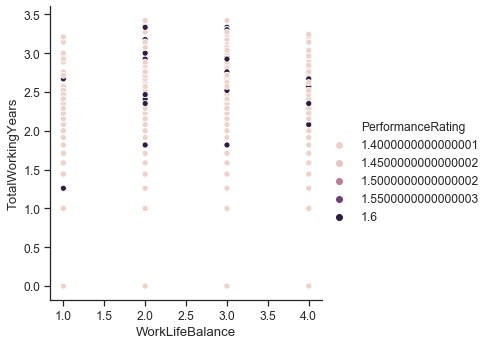

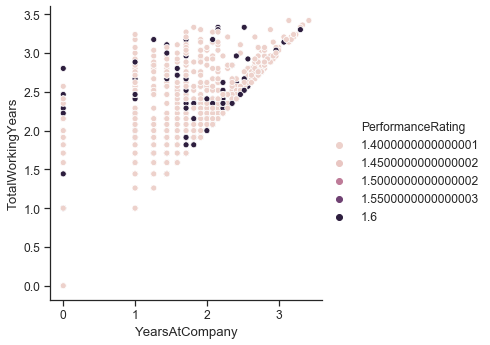

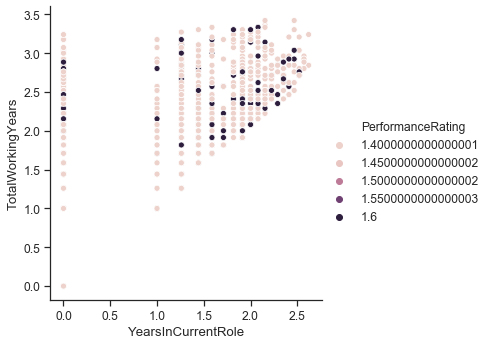

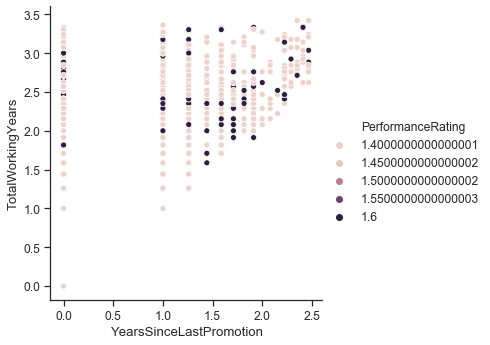

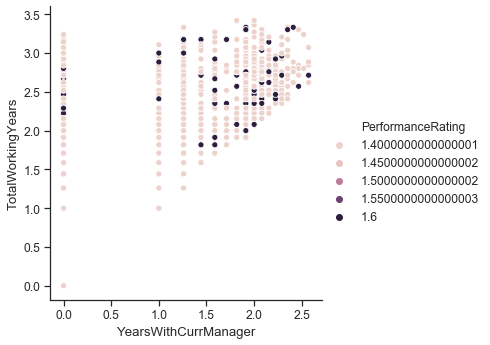

In [14]:
sns.set(style='ticks', palette="deep", font_scale=1.1)
for col in data_int:
    sns.relplot(x=col,y='TotalWorkingYears',hue='PerformanceRating',data=data)

From the above sets of Graph we can see that Total working years have a positive linear relationship with most of the graphs and from the data we should focus and priorities to retain employees with higher performance rating, as attrition of the employee who has high performance rating will have the high impact.

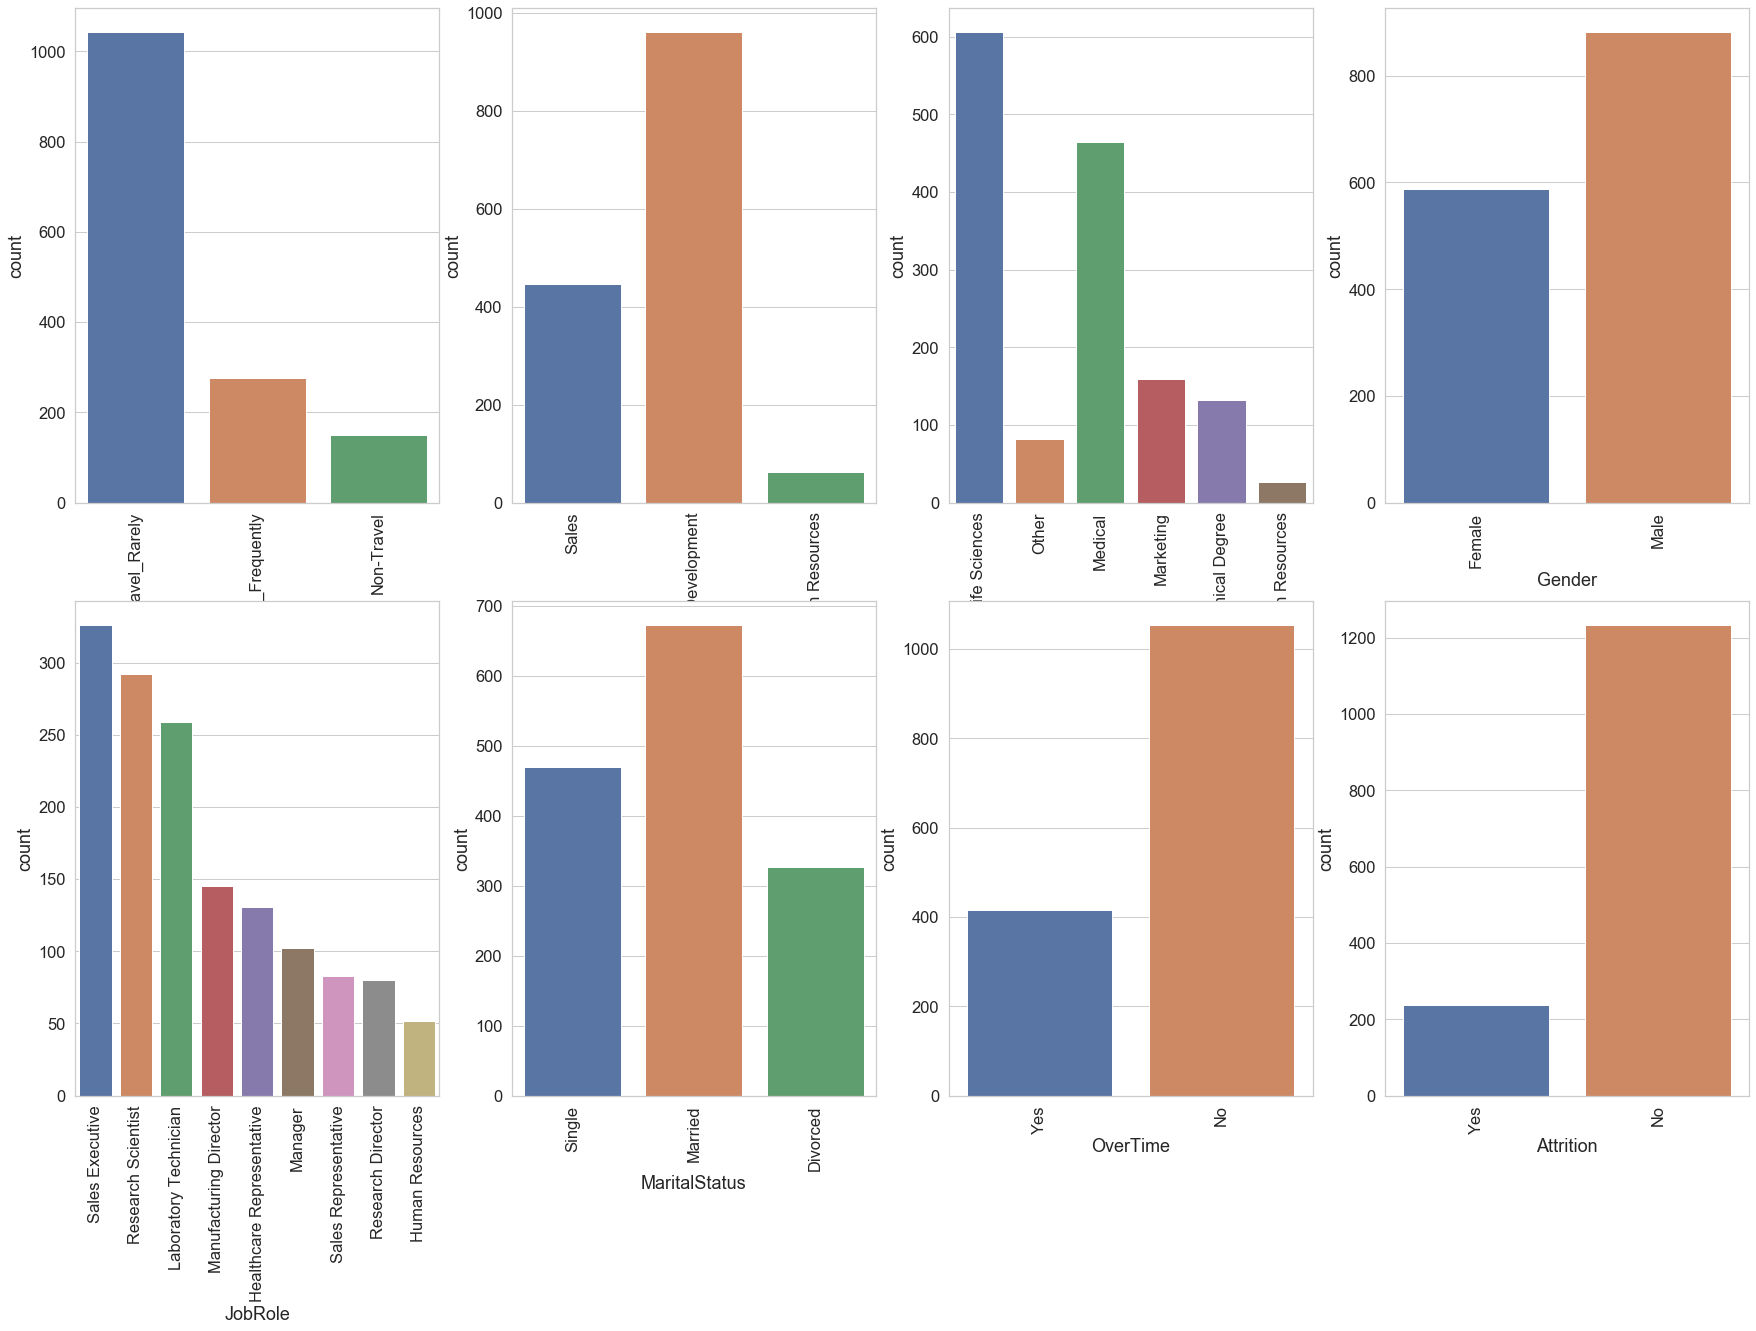

In [23]:
fig, ax = plt.subplots(2, 4, figsize=(30, 20))
for ct, subplot in zip(data_cat, ax.flatten()):
    sns.countplot(data[ct], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

From the above graph we can see that Number of employees in each categorical features

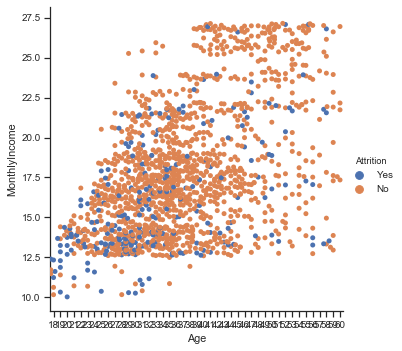

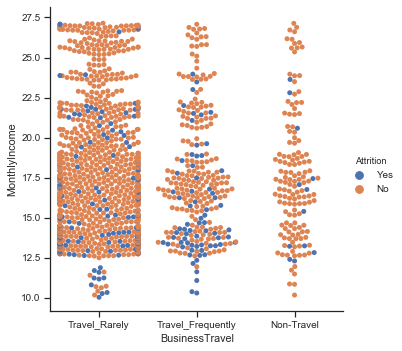

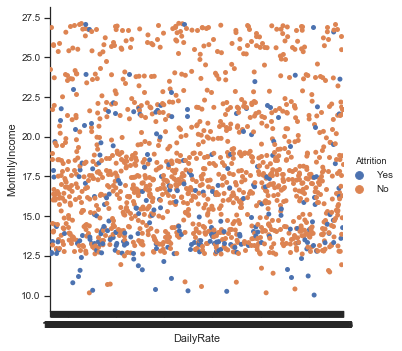

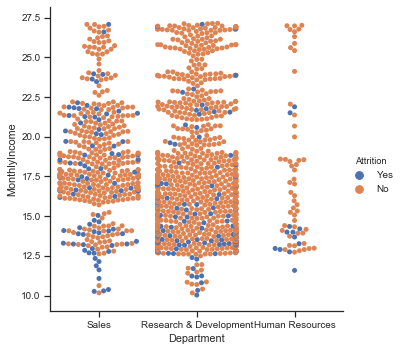

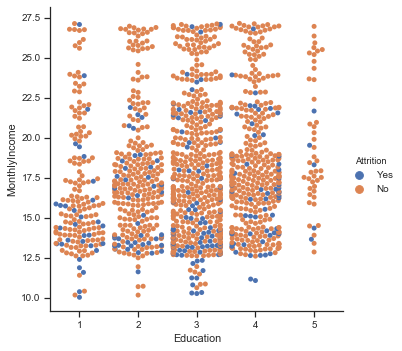

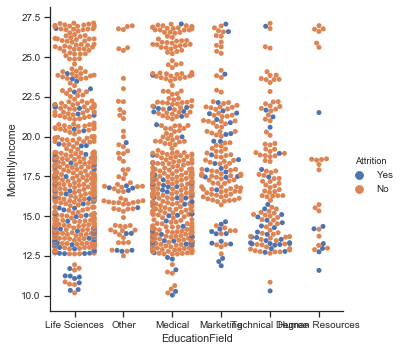

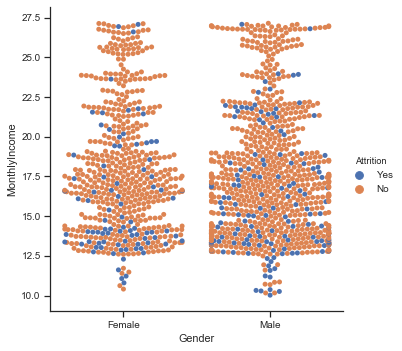

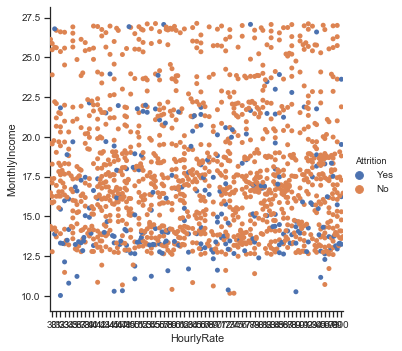

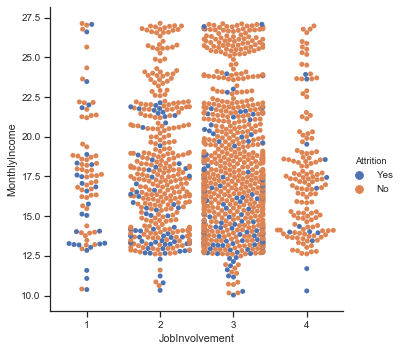

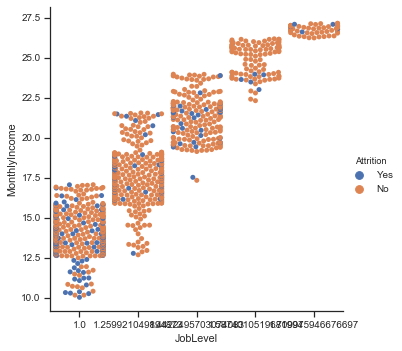

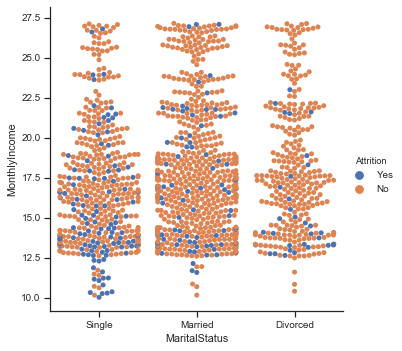

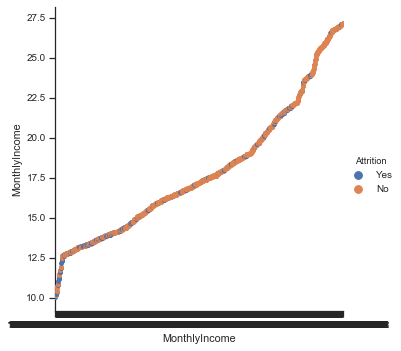

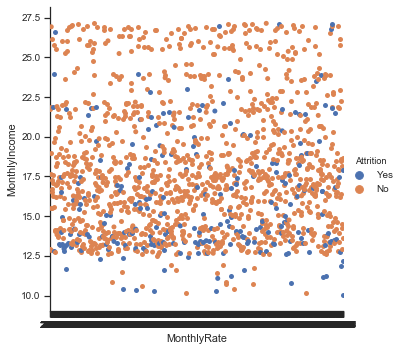

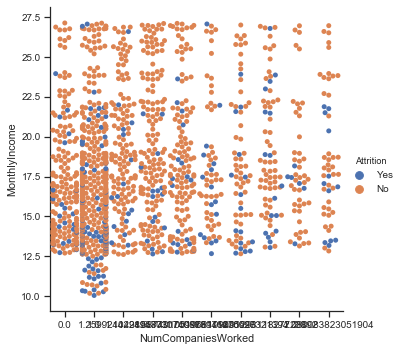

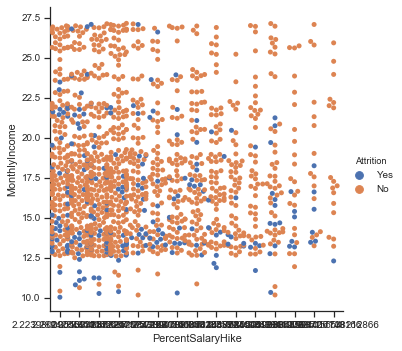

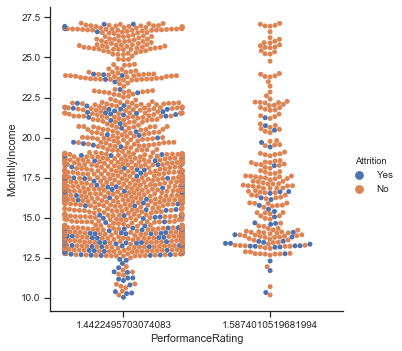

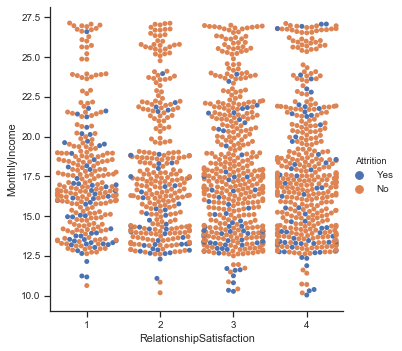

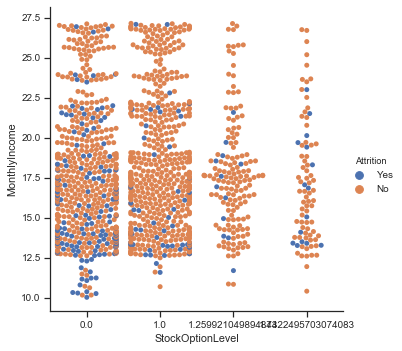

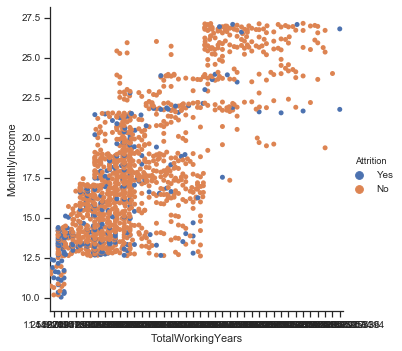

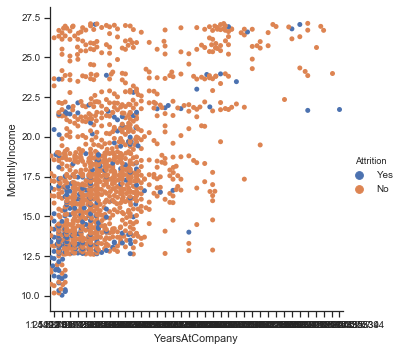

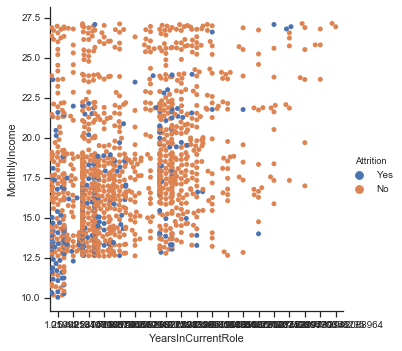

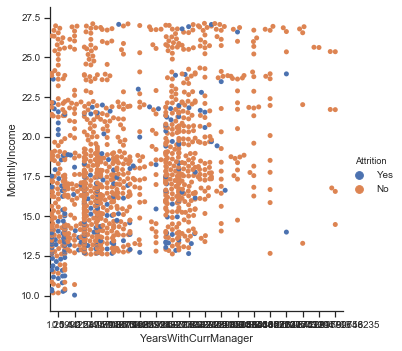

In [32]:
sns.set(style='ticks', palette="deep", font_scale=0.9)
for i in data:
    sns.catplot(x=i, y='MonthlyIncome',hue='Attrition',data=data,kind='swarm')

From the above sets of graph we can  few factors as employees whose age is low have higher attrition rate, further checked and found that the employees who have more statisfaction level, relationship with the manager have low rate of attrition, and employees who are single have higher attrition rate.

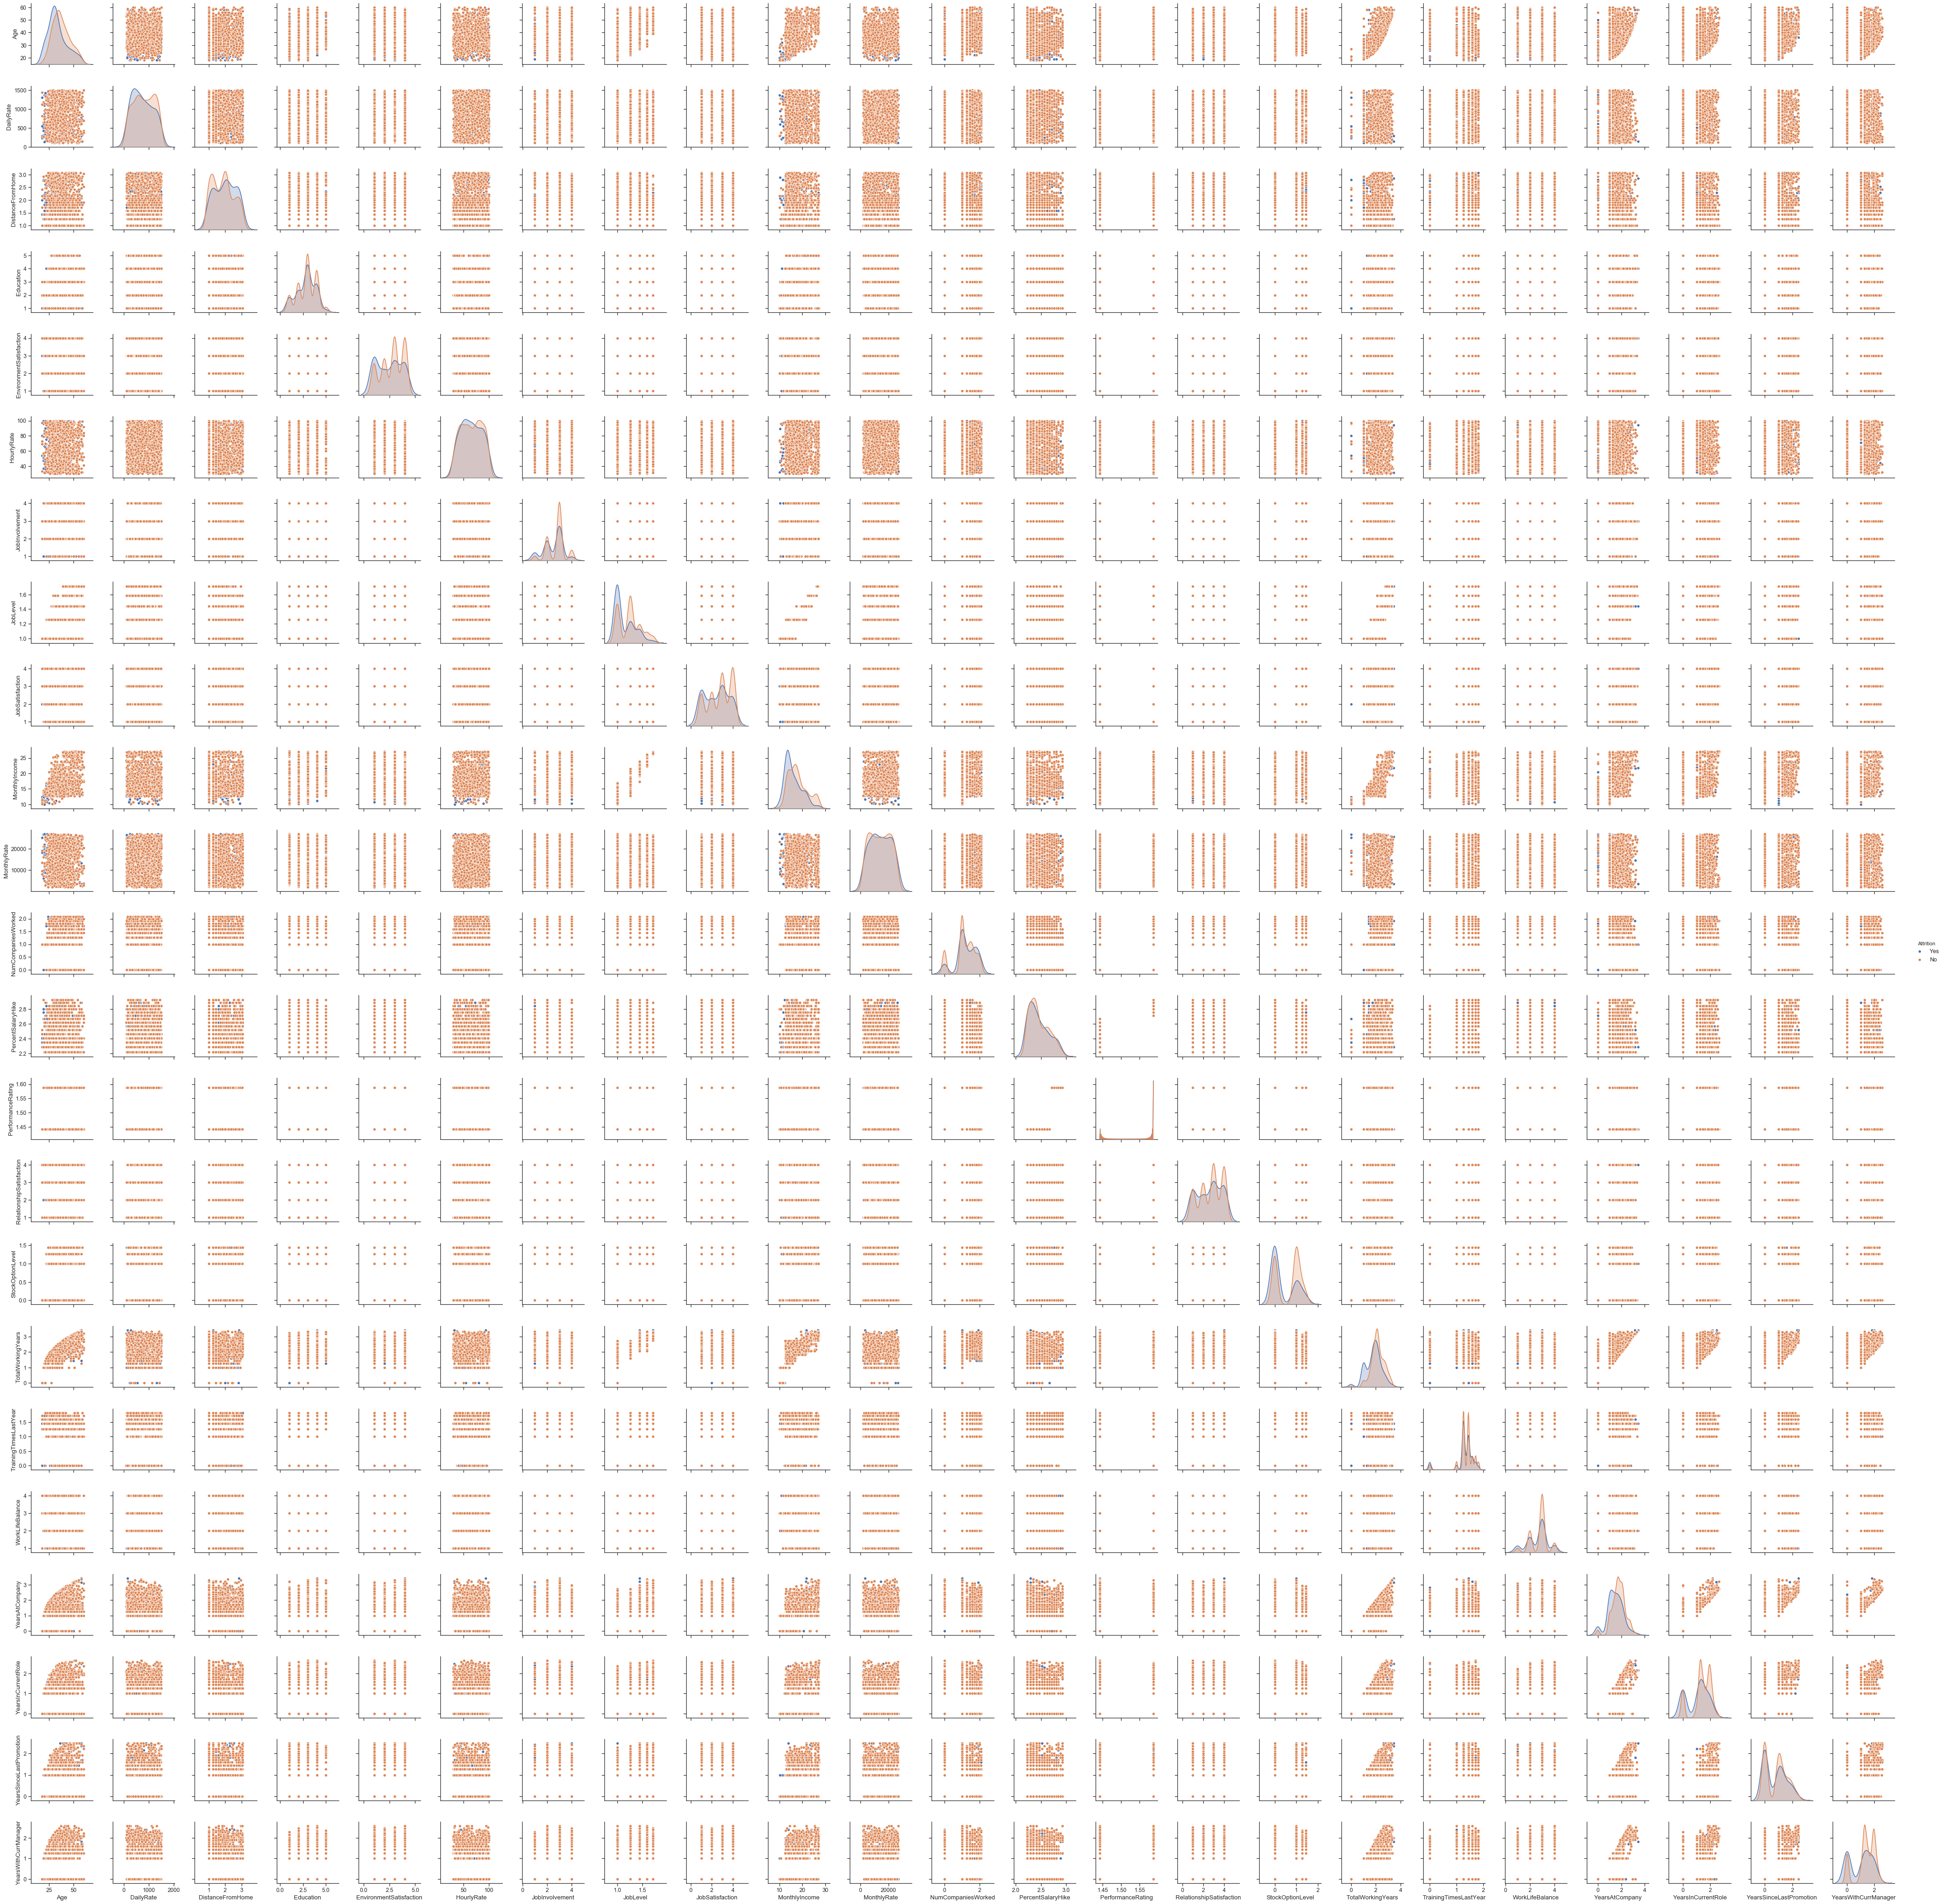

In [17]:
sns.pairplot(data,hue='Attrition')

## Lets Encode our categorical variables

In [10]:
data.head()

Age     BusinessTravel  DailyRate              Department  \
0   41      Travel_Rarely       1102                   Sales   
1   49  Travel_Frequently        279  Research & Development   
2   37      Travel_Rarely       1373  Research & Development   
3   33  Travel_Frequently       1392  Research & Development   
4   27      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0          1.000000          2  Life Sciences                        2   
1          2.000000          1  Life Sciences                        3   
2          1.259921          2          Other                        4   
3          1.442250          4  Life Sciences                        4   
4          1.259921          1        Medical                        1   

   Gender  HourlyRate  ...  RelationshipSatisfaction  StockOptionLevel  \
0  Female          94  ...                         1               0.0   
1    Male          61  ...                         4               1.0   
2    Male          92  ...                         2               0.0   
3  Female          56  ...                         3               0.0   
4    Male          40  ...                         4               1.0   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0          2.000000                0.00000               1        1.817121   
1          2.154435                1.44225               3        2.154435   
2          1.912931                1.44225               3        0.000000   
3          2.000000                1.44225               3        2.000000   
4          1.817121                1.44225               3        1.259921   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  Attrition  
0            1.587401                 0.000000             1.709976        Yes  
1            1.912931                 1.000000             1.912931         No  
2            0.000000                 0.000000             0.000000        Yes  
3            1.912931                 1.442250             0.000000         No  
4            1.259921                 1.259921             1.259921         No  

[5 rows x 31 columns]

In [11]:
data['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [12]:
data['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [13]:
data['BusinessTravel']=data['BusinessTravel'].map({'Non-Travel':0,'Travel_Frequently':1,'Travel_Rarely':2})

In [14]:
data['Department']=data['Department'].map({'Sales':0,'Research & Development':1,'Human Resources':2})

In [15]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
data['Attrition']=LE.fit_transform(data['Attrition'])
data['Gender']=LE.fit_transform(data['Gender'])
data['OverTime']=LE.fit_transform(data['OverTime'])

In [16]:
data['EducationField']= pd.get_dummies(data['EducationField'], drop_first=True)
data['MaritalStatus']=pd.get_dummies(data['MaritalStatus'], drop_first=True)
data['JobRole']=pd.get_dummies(data['JobRole'], drop_first=True)

## Lets Split and scale the dependent and independent variables

In [17]:
x=data.iloc[:,:-1]
x.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0   41               2       1102           0          1.000000          2   
1   49               1        279           1          2.000000          1   
2   37               2       1373           1          1.259921          2   
3   33               1       1392           1          1.442250          4   
4   27               2        591           1          1.259921          1   

   EducationField  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
0               1                        2       0          94  ...   
1               1                        3       1          61  ...   
2               0                        4       1          92  ...   
3               1                        4       0          56  ...   
4               0                        1       1          40  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0           1.442250                         1               0.0   
1           1.587401                         4               1.0   
2           1.442250                         2               0.0   
3           1.442250                         3               0.0   
4           1.442250                         4               1.0   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0           2.000000                0.00000                1        1.817121   
1           2.154435                1.44225                3        2.154435   
2           1.912931                1.44225                3        0.000000   
3           2.000000                1.44225                3        2.000000   
4           1.817121                1.44225                3        1.259921   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0            1.587401                 0.000000              1.709976  
1            1.912931                 1.000000              1.912931  
2            0.000000                 0.000000              0.000000  
3            1.912931                 1.442250              0.000000  
4            1.259921                 1.259921              1.259921  

[5 rows x 30 columns]

In [18]:
y=data['Attrition']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

In [19]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x=mm.fit_transform(x)

In [20]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=56,stratify=y)

In [21]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1176, 30), (294, 30), (1176,), (294,))

## Lets Implement Ml Algorithms

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [23]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=56)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=200,random_state=56)
GBC=GradientBoostingClassifier(n_estimators=200,random_state=56)
ABC=AdaBoostClassifier(random_state=56)
ETC=ExtraTreesClassifier(random_state=56)

In [24]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

---------------------> KNeighborsClassifier <----------------------


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score =  0.8435374149659864


Cross_Val_Score =  0.8421819709001704


roc_auc_score =  0.5537083297441641


classification_report
               precision    recall  f1-score   support

           0       0.86      0.98      0.91       247
           1       0.55      0.13      0.21        47

    accuracy                           0.84       294
   macro avg       0.70      0.55      0.56       294
weighted avg       0.81      0.84      0.80       294



[[242   5]
 [ 41   6]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



---------------------> SVC <----------------------


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max

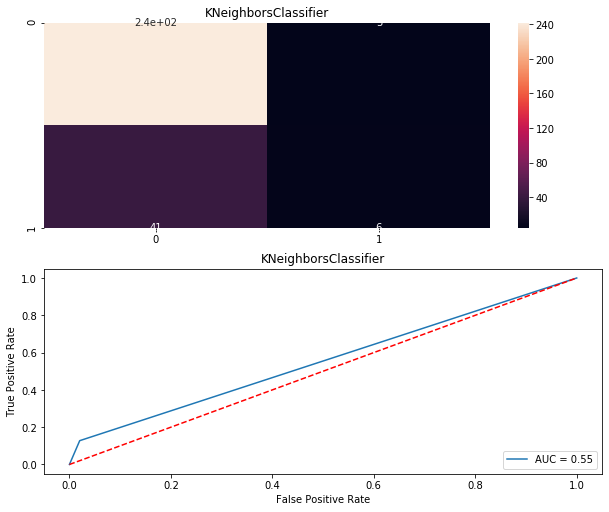

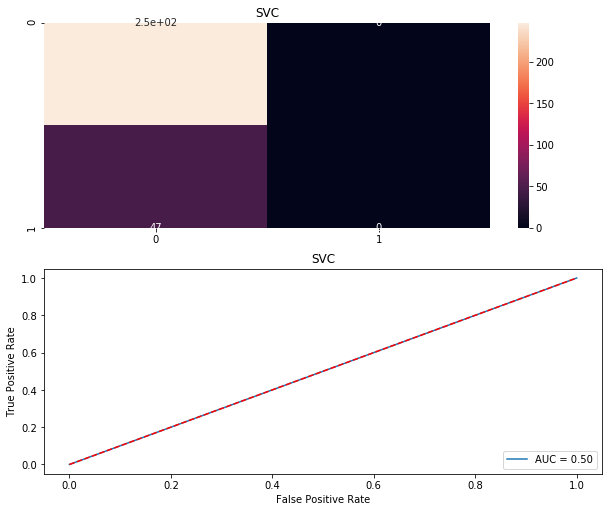

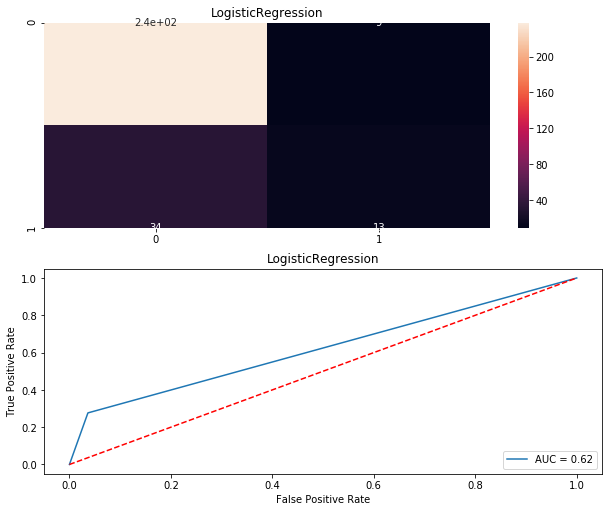

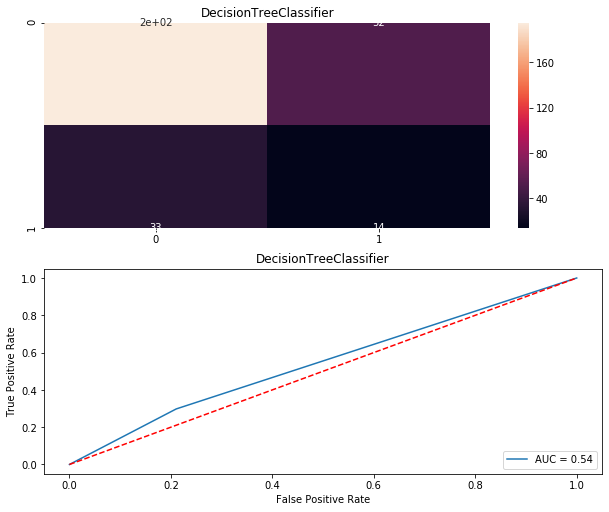

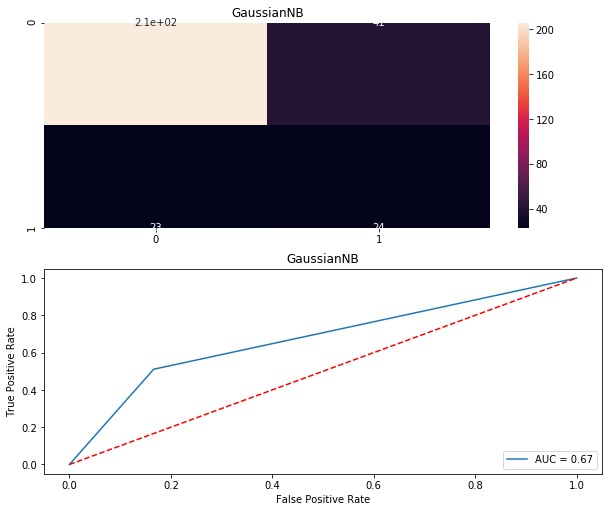

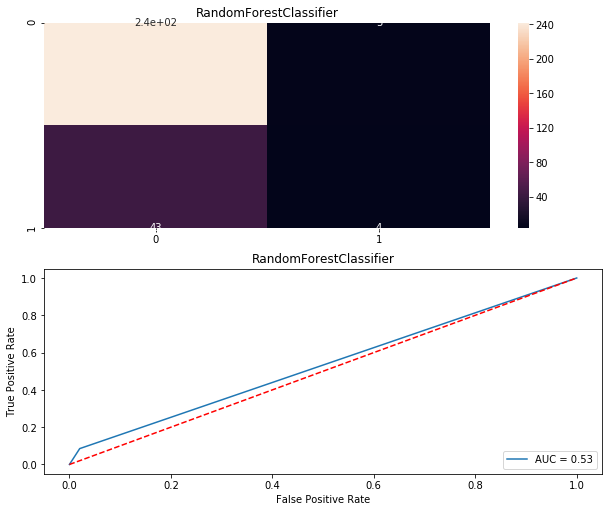

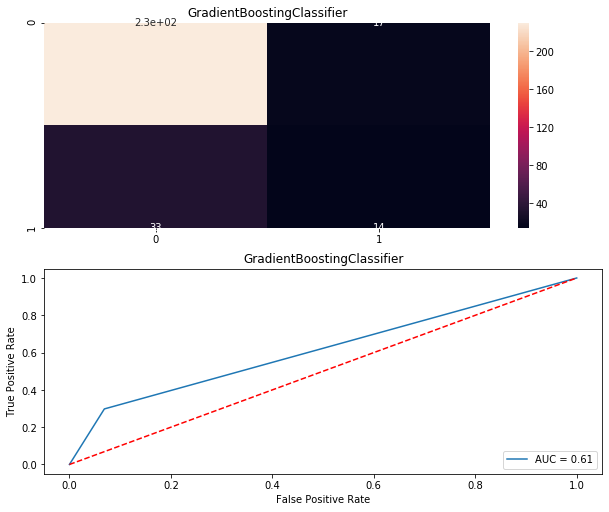

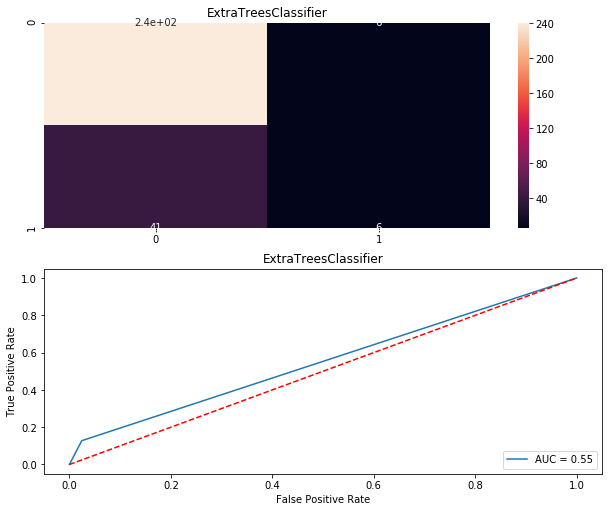

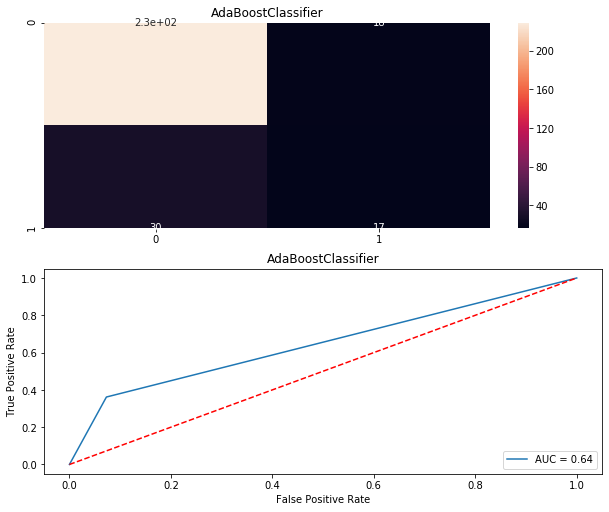

In [25]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('--------------------->',name,'<----------------------')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [26]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

Model  Accuracy_score  Cross_val_score  Roc_auc_curve
0        KNeighborsClassifier        0.843537         0.842182       0.553708
1                         SVC        0.840136         0.838785       0.500000
2          LogisticRegression        0.853741         0.875526       0.620079
3      DecisionTreeClassifier        0.710884         0.795261       0.543673
4                  GaussianNB        0.782313         0.799944       0.672323
5      RandomForestClassifier        0.836735         0.853770       0.532432
6  GradientBoostingClassifier        0.829932         0.861267       0.614523
7        ExtraTreesClassifier        0.840136         0.857158       0.551684
8          AdaBoostClassifier        0.836735         0.876224       0.644414

From the above we can see that the above we can see Logistic Regression is performing the best, so we  choose Logistic Regression as our final model.

In [32]:
from sklearn.externals import joblib
joblib.dump(LR,'Model_hr_Attrition.obj')

['Model_hr_Attrition.obj']

In [33]:
model=joblib.load('Model_hr_Attrition.obj')

In [34]:
model.predict(x_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0])